In [1]:
from numpy import genfromtxt
import matplotlib.pyplot as plt

bands = genfromtxt('./helpers/bands.csv', delimiter=',')
dataset = genfromtxt('../datasets/training/11042019/dataset_bbl.csv', delimiter=',')
dataset.shape

(739, 225)

In [2]:
X = dataset[1:,:-1]
y = dataset[1:,-1]
X.shape, y.shape

((738, 224), (738,))

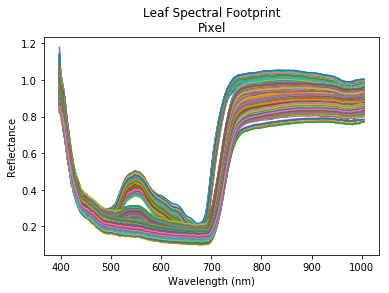

In [3]:
band_range = bands[:]

for i in range(1, X.shape[0]):
    plt.plot(band_range, X[i])

plt.title('Leaf Spectral Footprint\nPixel')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# train size 5/6 or ~83.3%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/6)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((738, 224), (738,), (615, 224), (123, 224), (615,), (123,))

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Sequential()
model.add(Dense(224, input_dim=X.shape[1], activation='relu'))
model.add(Dense(112, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam')
seed = 7

np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/home/nodeflux/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: __call__() missing 1 required positional argument: 'inputs'